## Template Matching

### Template Matching in OpenCV


### Template Matching with Multiple Objects

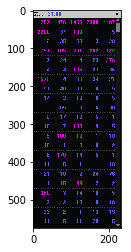

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('./images/stock.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
plt.imshow(img_rgb)
plt.show()

In [2]:
template = cv2.imread('./images/templates/1.png', 0)

w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.98
loc = np.where(res>=threshold)

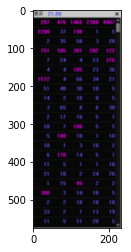

In [3]:
# this will marking all your templates place.
plt.imshow(img_rgb, cmap='gray', interpolation='bicubic')
plt.show()

## OCR

In [5]:
import os
import cv2
import numpy as np
import collections

img_rgb = cv2.imread('./images/stock.png')
rr = []
def detect(img_rgb):
    def group(ls: list):
        s = ''
        for index, value in enumerate(ls):
            if index < len(ls)-1 and ls[index+1][0] - value[0] < 10:
                s += value[1]
            else:
                s += value[1]
                rr.append(s)
                s = ''
    path = './images/templates'
    res = collections.defaultdict(list)

    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

    for name in os.listdir(path):
        if not name.endswith('.png'):
            continue
        template = cv2.imread(os.path.join(path, name), 0)
        temp = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
        loc = np.where(temp>=0.98)
        num = name.split('.')[0]
        for i in zip(*loc):
            res[i[0]].append((i[1], num))
    # sort
    res = sorted(res.items())
    [r[1].sort()for r in res]

    [group(r[1]) for r in res]

detect(img_rgb)

for i in range(0, len(rr), 5):
    print(rr[i: i+5])


['207', '476', '1466', '2380', '4487']
['2200', '37', '190', '1', '5']
['2', '35', '50', '3', '20']
['751', '105', '301', '282', '122']
['7', '24', '4', '23', '376']
['4', '4', '105', '23', '36']
['1572', '4', '66', '34', '21']
['51', '40', '30', '10', '5']
['14', '2', '10', '8', '5']
['3', '65', '8', '6', '30']
['2', '17', '10', '5', '1']
['10', '7', '100', '5', '5']
['5', '100', '10', '1', '10']
['10', '1', '3', '10', '2']
['6', '170', '14', '5', '1']
['11', '5', '1', '1', '10']
['21', '10', '2', '24', '76']
['1', '15', '99', '2', '2']
['380', '3', '14', '10', '5']
['2', '2', '10', '10', '10']
['33', '2', '1', '13', '19']
['11', '5', '11', '20', '5']
